In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import pandas as pd
import numpy as np
import re

# Reading DataSet

In [2]:
covid_df = pd.read_csv('covid_19_data.csv')
covid_df.columns = ['#','ObsDate','State','Country','LastUpdate','Confirmed','#Deaths','Recovered']
covid_df.head()

,#,ObsDate,State,Country,LastUpdate,Confirmed,#Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid_df['ObsDate'] = pd.to_datetime(covid_df.ObsDate)

In [4]:
grouped_df = covid_df.groupby(by=['Country'])[['ObsDate','Confirmed','#Deaths','Recovered']]
grouped_df.apply(lambda _df : _df.sort_values(by=['ObsDate']))
grouped_df.apply(lambda _df : _df.reset_index(drop=True))

ObsDate  Confirmed  #Deaths  Recovered
Country                                                                    
 Azerbaijan                    0  2020-02-28        1.0      0.0        0.0
('St. Martin',)                0  2020-03-10        2.0      0.0        0.0
Afghanistan                    0  2020-02-24        1.0      0.0        0.0
                               1  2020-02-25        1.0      0.0        0.0
                               2  2020-02-26        1.0      0.0        0.0
                               3  2020-02-27        1.0      0.0        0.0
                               4  2020-02-28        1.0      0.0        0.0
                               5  2020-02-29        1.0      0.0        0.0
                               6  2020-03-01        1.0      0.0        0.0
                               7  2020-03-02        1.0      0.0        0.0
                               8  2020-03-03        1.0      0.0        0.0
                               9  2020-03-04        1.0      0.0        0.0
                               10 2020-03-05        1.0      0.0        0.0
                               11 2020-03-06        1.0      0.0        0.0
                               12 2020-03-07        1.0      0.0        0.0
                               13 2020-03-08        4.0      0.0        0.0
                               14 2020-03-09        4.0      0.0        0.0
                               15 2020-03-10        5.0      0.0        0.0
                               16 2020-03-11        7.0      0.0        0.0
                               17 2020-03-12        7.0      0.0        0.0
                               18 2020-03-13        7.0      0.0        0.0
                               19 2020-03-14       11.0      0.0        0.0
                               20 2020-03-15       16.0      0.0        0.0
                               21 2020-03-16       21.0      0.0        1.0
                               22 2020-03-17       22.0      0.0        1.0
                               23 2020-03-18       22.0      0.0        1.0
                               24 2020-03-19       22.0      0.0        1.0
                               25 2020-03-20       24.0      0.0        1.0
                               26 2020-03-21       24.0      0.0        1.0
                               27 2020-03-22       40.0      1.0        1.0
...                                      ...        ...      ...        ...
Zimbabwe                       30 2020-04-19       25.0      3.0        2.0
                               31 2020-04-20       25.0      3.0        2.0
                               32 2020-04-21       28.0      3.0        2.0
                               33 2020-04-22       28.0      4.0        2.0
                               34 2020-04-23       28.0      4.0        2.0
                               35 2020-04-24       29.0      4.0        2.0
                               36 2020-04-25       31.0      4.0        2.0
                               37 2020-04-26       31.0      4.0        2.0
                               38 2020-04-27       32.0      4.0        5.0
                               39 2020-04-28       32.0      4.0        5.0
                               40 2020-04-29       32.0      4.0        5.0
                               41 2020-04-30       40.0      4.0        5.0
                               42 2020-05-01       40.0      4.0        5.0
                               43 2020-05-02       34.0      4.0        5.0
                               44 2020-05-03       34.0      4.0        5.0
                               45 2020-05-04       34.0      4.0        5.0
                               46 2020-05-05       34.0      4.0        5.0
                               47 2020-05-06       34.0      4.0        5.0
                               48 2020-05-07       34.0      4.0        5.0
                               49 2020-05-08       34.0      4.0        9.0
         

In [5]:
num_days  = (grouped_df.get_group('Egypt')['ObsDate'].max()-grouped_df.get_group('Egypt')['ObsDate'].min()).days
days_series = np.arange(0,num_days+1,dtype=np.int8)

confirmed = grouped_df.get_group('Egypt')['Confirmed'].values
Deaths    = grouped_df.get_group('Egypt')['#Deaths'].values
Recovered = grouped_df.get_group('Egypt')['Recovered'].values

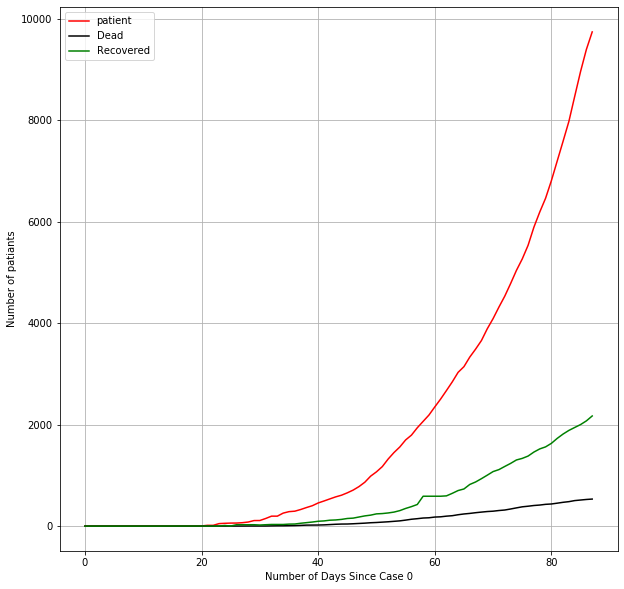

In [6]:
plt.figure(num=1,figsize=(10,10))
plt.plot(days_series,confirmed,'r',label='patient')
plt.plot(days_series,Deaths,'k',label='Dead')
plt.plot(days_series,Recovered,'g',label='Recovered')
plt.xlabel('Number of Days Since Case 0')
plt.ylabel('Number of patiants')
plt.legend()
plt.grid()
plt.show()

# Question : Is it really the right order ?

### To answer this question we need to determine the total number of patients as a ratio of the total number of tests every country has made. Not to forget about the population statistics.

In [7]:
# Get My DataFrame ready for concatenation 
def ret_may(values):
    for i,value in enumerate(values):
        if(value.month == 5):
            if(value.day == 11):
                return i
    return i
            
countries = pd.DataFrame(grouped_df.apply(lambda _df : _df.iloc[ret_may(_df['ObsDate'])]))
#countries = countries[['Country','Confirmed','#Deaths','Recovered']]
#countries.index = np.arange(countries['Country'].count())

In [8]:
countries.head(8)

,ObsDate,Confirmed,#Deaths,Recovered
Country,,,,
Azerbaijan,2020-02-28,1.0,0.0,0.0
"('St. Martin',)",2020-03-10,2.0,0.0,0.0
Afghanistan,2020-05-11,4687.0,122.0,558.0
Albania,2020-05-11,872.0,31.0,654.0
Algeria,2020-05-11,5891.0,507.0,2841.0
Andorra,2020-05-11,755.0,48.0,550.0
Angola,2020-05-11,45.0,2.0,13.0
Antigua and Barbuda,2020-05-11,25.0,3.0,19.0


In [16]:
# Read the Other Dataset
covid_all = pd.read_csv('covid19-tests/CovidTests-UntilNow.csv')
covid_all.head()

,Country,Date,Tested,Units,Positive,Positive/Tested %,Source_1,Source_2,FileDate
0,Albania,9 May,10268.0,cases,856.0,8.30,https://new.shendetesia.gov.al/covid19-ministr...,,NaN
1,Argentina,6 May,72315.0,cases,5020.0,6.90,https://www.argentina.gob.ar/sites/default/fil...,,NaN
2,Armenia,5 May,25846.0,cases,2619.0,10.10,https://ncdc.am/coronavirus/confirmed-cases-by...,,NaN
3,Australia,10 May,827872.0,cases,6941.0,0.84,https://www.health.gov.au/news/health-alerts/n...,,NaN
4,Austria,11 May,319484.0,cases,15815.0,5.00,https://www.sozialministerium.at/Informationen...,,NaN


In [17]:
m_n = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}

def map_fun(string):
    if(re.findall('[\W+]',string)):
        sentence    = re.split('\W+',string)
        if(len(sentence) <= 3):
            sentence.append('2020')
        sentence[1] = m_n[sentence[1][0:3]]
        return '-'.join(sentence)
    else:
        return np.nan


In [18]:
covid_all['Date'] = covid_all['Date'].apply(str)
covid_all['Date'] = pd.to_datetime(np.vectorize(map_fun)(covid_all['Date'].values))

In [21]:
PosPtest = covid_all.groupby(by=['Country']).mean()[['Positive/Tested %']]#.apply(lambda _df : _df.sort_values(by=['Date']))[['Date','Tested','Positive/Tested %']]
PosPtest.apply(lambda _df : _df.reset_index(drop=True))
PosPtest = pd.DataFrame(PosPtest)

In [22]:
final = PosPtest.merge(countries,how='inner',left_index=True,right_index=True,sort=True)[['Confirmed','#Deaths','Recovered','Positive/Tested %']]

In [23]:
final = final.sort_values(by=['Positive/Tested %'],ascending=False)
final['Country']= final.index
final = final[['Country','Confirmed','#Deaths','Recovered','Positive/Tested %']]
final.index = np.arange(len(final.index))

In [26]:
final.head(10)

,Country,Confirmed,#Deaths,Recovered,Positive/Tested %
0,Tanzania,509.0,21.0,183.0,73.616000
1,Sudan,1526.0,74.0,162.0,66.615000
2,Burkina Faso,760.0,50.0,584.0,49.944000
3,Ecuador,29509.0,2145.0,3433.0,33.170909
4,Guinea,2146.0,11.0,714.0,24.752000
5,Cameroon,2689.0,125.0,1524.0,24.404000
6,Iran,109286.0,6685.0,87422.0,23.561818
7,France,175479.0,26604.0,55561.0,21.840000
8,Philippines,11086.0,726.0,1999.0,21.176364
9,Mexico,36327.0,3573.0,23100.0,19.851818


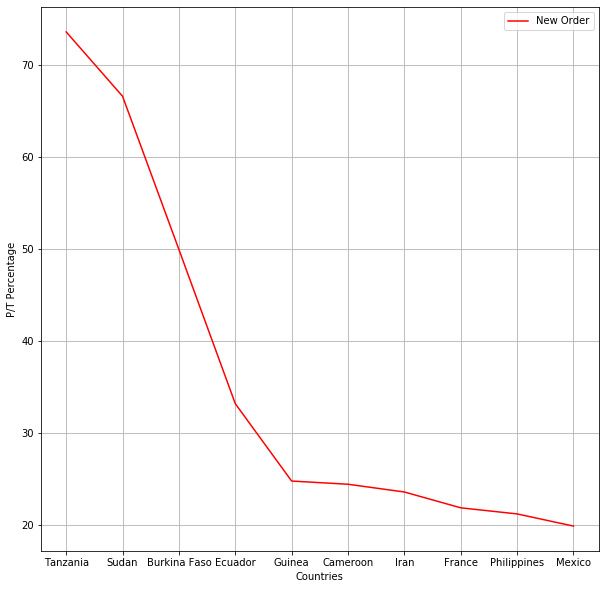

In [34]:
plt.figure(num=2,figsize=(10,10))
plt.plot(final['Country'].values[0:10],final['Positive/Tested %'].values[0:10],'r',label='New Order')
plt.xlabel('Countries')
plt.ylabel('P/T Percentage')
plt.legend()
plt.grid()
plt.show()